Data Preprocessing

In [134]:
#imports
import numpy as np
from sklearn.model_selection import train_test_split
import random
import math

def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [135]:
data_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
my_data = np.genfromtxt(data_path, delimiter=',')

In [143]:
x = my_data[:, :-1]
y = my_data[:, -1]

x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, train_size=.70, random_state=1, stratify=y)

x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=.50, random_state=1, stratify=y_test_val)

In [144]:
print(y_test_val.shape)
print(x_val.shape)

(231,)
(116, 8)


In [145]:
class BinaryLR:
    def __init__(self, lr, max_itr):
        self.lr = lr
        self.max_itr = max_itr

    # @staticmethod
    def init_train_set(self, x_train):
        X_p = []
        for eachData in x_train:
            lst = eachData.tolist()
            lst.append(1)
            X_p.append(lst)

        theta_size = np.asarray(X_p).shape

        self.x_train = np.asarray(X_p)
        self.theta_size = theta_size[1]

        return  np.asarray(X_p), theta_size[1]

    def train_model(self, x_train, y_train):
        self.init_train_set(x_train)
        max_iter = self.max_itr
        lr_set= self.lr
        x_train = self.x_train
        size = self.theta_size
        history = []
        set_of_theta = []
        set_of_history = []

        for lr in lr_set:
            history.clear()
            theta = np.random.random(size)

            for itr in range(0, max_iter):
                TJ = 0
                i = 0
                for eachSample in x_train:
                    z = np.dot(eachSample, theta)
                    h = sigmoid(z)
                    J = -(y_train[i]*np.log(h)) - ((1-y_train[i]) * np.log(1-h))
                    TJ += J
                    dv = np.multiply(eachSample, (h-y_train[i]))
                    theta = theta - dv * lr
                    i += 1
                TJ = TJ/len(x_train)
                history.append(TJ)

            set_of_theta.append(theta)
            set_of_history.append(history)
        return set_of_theta, set_of_history


In [146]:
np.seterr(divide = 'ignore')
lr_set =[0.1,0.01,0.001,0.0001]

obj = BinaryLR(lr_set, 500)

set_of_theta, set_of_history = obj.train_model(x_train, y_train)
# print(np_arr.shape)
# print(obj.x_train.shape)


In [147]:
val_set, theta_size = obj.init_train_set(x_val)
# print(val_set)

validation

In [152]:
for theta in set_of_theta:
    count=0
    i = 0
    for val in val_set:
        z=np.dot(val,theta)
        h=sigmoid(z)
        if h>=0.5:
            h=1
        else:
            h=0

        if h==y_val[i]:
          count=count+1
        i += 1

    validation_accuracy=(count/len(x_val))*100
    print(validation_accuracy)

61.206896551724135
63.793103448275865
62.93103448275862
59.48275862068966


In [151]:
test_set, test_theta_size = obj.init_train_set(x_test)

count=0
i = 0
for T in test_set:
    Z=np.dot(T,set_of_theta[1])
    h=sigmoid(Z)
    if h>=0.5:
        h=1
    else:
        h=0

    if h==y_test[i]:
        count=count+1
    i += 1

Test_accuracy=(count/len(x_test))*100
print(Test_accuracy)

65.21739130434783


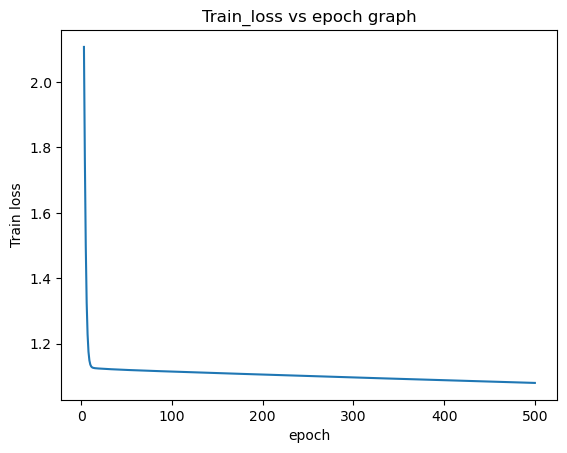

In [154]:
epoch_list=list(range(1,501))
# print(set_of_history[0])

import matplotlib.pyplot as plt
plt.plot(epoch_list,set_of_history[0])

plt.xlabel('epoch')

plt.ylabel('Train loss')
plt.title('Train_loss vs epoch graph')
plt.show()
